In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
os.getcwd()

'C:\\Users\\bhardwaj'

In [3]:
os.chdir('C:\\Users\\bhardwaj\\Desktop')

In [4]:
credit = pd.read_csv("creditcard.csv")

In [5]:
credit.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
credit['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [7]:
# Totol amount froud detected
credit.groupby('Class')[['Amount']].sum()

,Amount
Class,
0,2.510246e+07
1,6.012797e+04


In [8]:
credit.groupby('Class')[['Amount']].max()

,Amount
Class,
0,25691.16
1,2125.87


In [9]:
credit.groupby('Class')[['Amount']].mean()

,Amount
Class,
0,88.291022
1,122.211321


In [10]:
import matplotlib.pyplot as plt

In [11]:
import seaborn as sns

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9420D8F60>]],
      dtype=object)

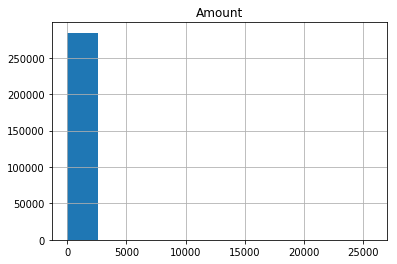

In [12]:
credit.hist(column='Amount')

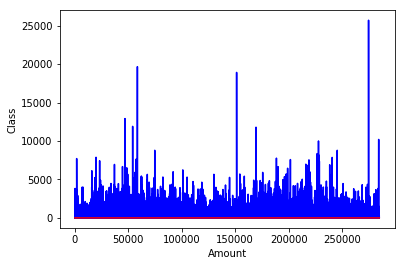

In [13]:
plt.plot(credit.Amount,color='blue')
plt.plot(credit.Class,color='red')
plt.xlabel('Amount')
plt.ylabel('Class')
plt.show()

In [14]:
credit.shape

(284807, 31)

In [15]:
# fraud percentage 
percentage=492*100/284807

In [16]:
print(percentage)

0.1727485630620034


In [17]:
credit1 = credit.drop(['Class'],axis =1)

In [18]:
credit2 = credit['Class']

In [19]:
credit2.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [20]:
credit.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [21]:
from sklearn import linear_model
from sklearn import metrics

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
# Defining the X and y variables 
#splitting te data
X = credit1
y = credit2
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [24]:
#creating logistic regression 
reg = linear_model.LogisticRegression()

In [25]:
# train the model on training set
mod = reg.fit(X_train,y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [26]:
# making prediction on the test set
pred = reg.predict(X_test)

In [27]:
#accuracy
print('accuracy:',metrics.accuracy_score(y_test,pred)*100)

accuracy: 99.9005184743045


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.73      0.59      0.65       135

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.86      0.80      0.83     85443
weighted avg       1.00      1.00      1.00     85443



In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(
    y_test.values, pred)

array([[85278,    30],
       [   55,    80]], dtype=int64)

In [30]:
confusion_score = (85278+80)/(85278+30+55+80)

In [31]:
print(confusion_score)

0.9990051847430451


In [32]:
credit.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
dit = DecisionTreeClassifier()
mod1 = dit.fit(X_train,y_train)
Y_pred = dit.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,Y_pred))

Accuracy: 0.9990871107053826


In [35]:
det1 = DecisionTreeClassifier(criterion ='entropy',max_depth = 3,random_state = 1)

In [36]:
mod2 = det1.fit(X_train,y_train)
prew = det1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,prew))

Accuracy: 0.9992860737567735


In [37]:
!pip install graphviz

In [38]:
!pip install pydotplus

In [39]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [40]:
list(credit1.columns)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [41]:
feature_col = ['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

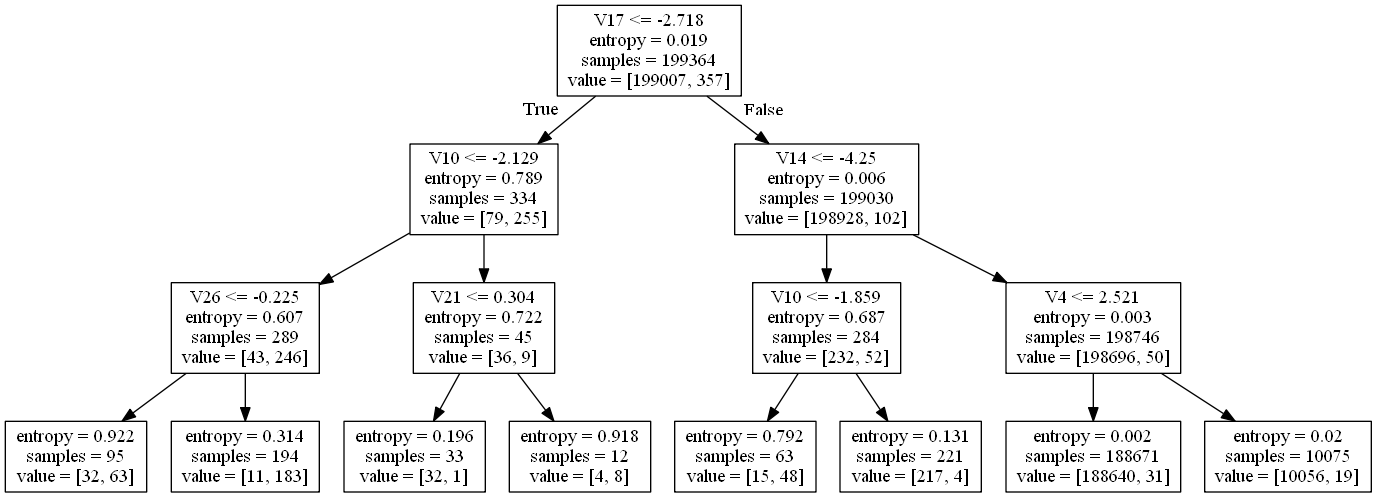

In [42]:
from IPython.display import Image  
from sklearn import tree
import pydotplus # installing pyparsing maybe needed
...

dot_data = tree.export_graphviz(det1, out_file=None,feature_names = feature_col)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

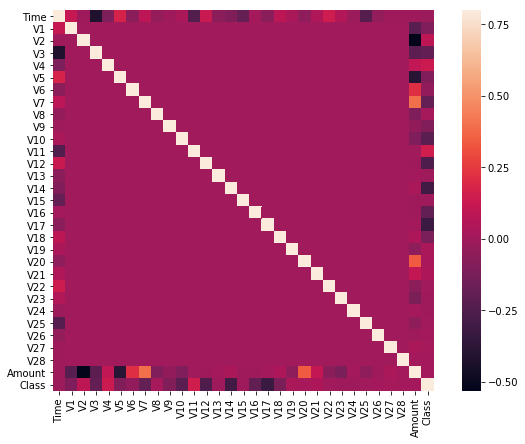

In [43]:
import seaborn as sns
corrmatrix = credit.corr()
f, ax = plt.subplots(figsize=(10,7))
sns.heatmap(corrmatrix, vmax=0.8, square=True)

In [44]:
det3 = DecisionTreeClassifier(criterion ='gini',max_depth = 3,random_state = 1)

In [45]:
mod3 = det3.fit(X_train,y_train)
pre = det1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,pre))

Accuracy: 0.9992860737567735


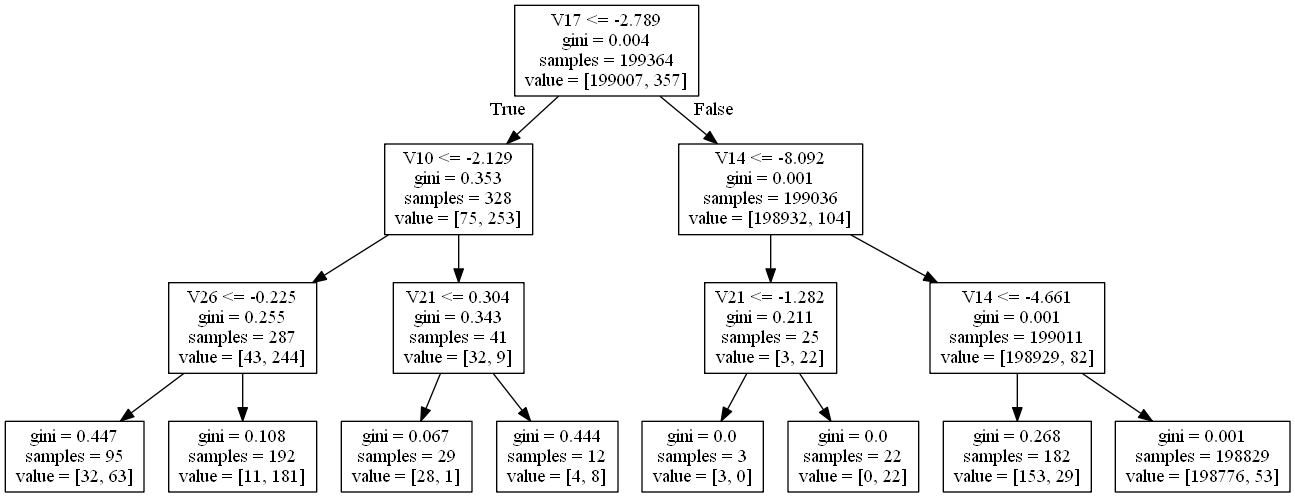

In [46]:
from IPython.display import Image  
from sklearn import tree
import pydotplus # installing pyparsing maybe needed
...

dot_data = tree.export_graphviz(det3, out_file=None,feature_names = feature_col)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [47]:
from sklearn import metrics

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
treeclass = RandomForestClassifier(n_estimators = 1000)

In [51]:
treeclass.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
y_pred  = treeclass.predict(X_test)

In [54]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9995201479348805


In [55]:
clf = tree.DecisionTreeClassifier(max_depth=3,random_state=200)

In [58]:
import sklearn.model_selection as model_selection

In [59]:
mod = model_selection.GridSearchCV(clf,param_grid={'max_depth':[2,3,4,5,6,]})
mod.fit(X_train,y_train)

C:\Users\bhardwaj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [2, 3, 4, 5, 6]}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [60]:
mod.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=200,
            splitter='best')

In [61]:
mod.best_score_

0.9994081178146506